## Clustering - finding groups of similar objects

Clustering methods:
- k-means
- hierarchial clustering
- gaussian mixtures
- DBSCAN

### K-means:

K-means find the the cluster centers by minimizing the intertia (withing cluster sum of squares)

ineritia = sum of squared distances of samples to their closest cluster center

intertia (function) = $\sum_{i=1}^{n}\sum_{x_j \in C_i} (dist(x_j, \mu_i))^2$

where $x_j$ is a sample in cluster $C_i$ and $\mu_i$ is the center of cluster $C_i$

Small inertia means dense clusters

Steps:
1. Choose the number of clusters
2. Randomly assign each point to a cluster
3. Until clusters stop changing, repeat the following:
    - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    - Assign each data point to the cluster for which the centroid is the closest


We can use the elbow method to find the optimal number of clusters.  The elbow method plots the inertia as a function of the number of clusters.  The elbow in the plot is the optimal number of clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

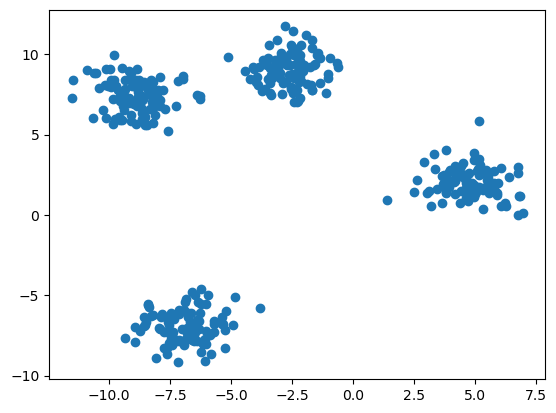

In [9]:
# toy example - 4 clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=42)

# plot
plt.scatter(X[:,0], X[:,1])#, c=y)
plt.show()

In [11]:
from sklearn.cluster import KMeans

# choose number of clusters
k = 4
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [14]:
# cluster centers
centers = km.cluster_centers_
centers

array([[ 4.74710337,  2.01059427],
       [-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [-8.92921104,  7.38196067]])

In [15]:
# cluster
labels = km.labels_
labels

array([3, 1, 3, 0, 0, 1, 1, 3, 1, 0, 3, 0, 3, 0, 2, 2, 2, 1, 0, 2, 0, 3,
       1, 0, 1, 3, 2, 1, 2, 3, 3, 0, 3, 3, 1, 2, 0, 0, 1, 2, 1, 3, 3, 2,
       0, 0, 1, 2, 1, 0, 1, 3, 2, 0, 0, 3, 0, 1, 3, 0, 2, 0, 3, 2, 1, 1,
       2, 2, 2, 3, 1, 2, 3, 0, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 2, 0, 3, 2,
       1, 2, 0, 1, 3, 2, 0, 3, 3, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1,
       1, 3, 0, 0, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 3, 2, 2, 0, 2, 1, 1, 1,
       2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 2, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 0,
       0, 1, 0, 3, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 3, 3, 0, 2, 2, 3, 2,
       3, 3, 0, 1, 2, 1, 1, 0, 3, 1, 3, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 3, 3, 2, 3, 3, 0, 2, 1, 1,
       3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 3, 1, 0, 0, 3,
       3, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 3, 1, 0, 2, 3, 1, 1,
       3, 3, 3, 0, 0, 3, 0, 0, 2, 3, 1, 1, 0, 3, 3,

In [18]:
# # plotting clusters loop
# for i in range(k):
#     plt.scatter(X[labels==i,0], X[labels==i,1])
#     plt.scatter(centers[i,0], centers[i,1], marker='*', s=200, c='k')
# plt.show()

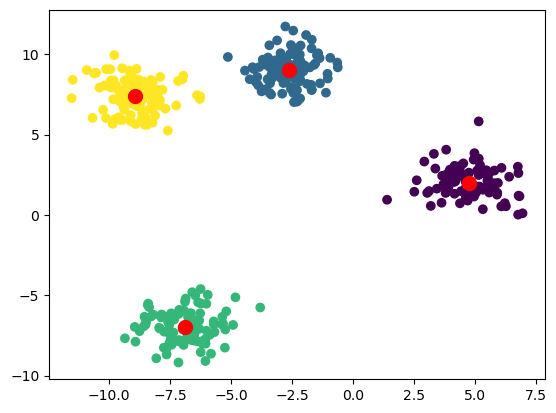

In [16]:
# plot clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

#### Finding the optimal number of clusters

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


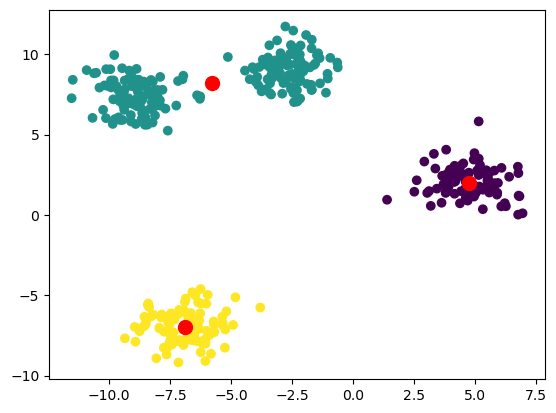

In [19]:
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

The elbow method:

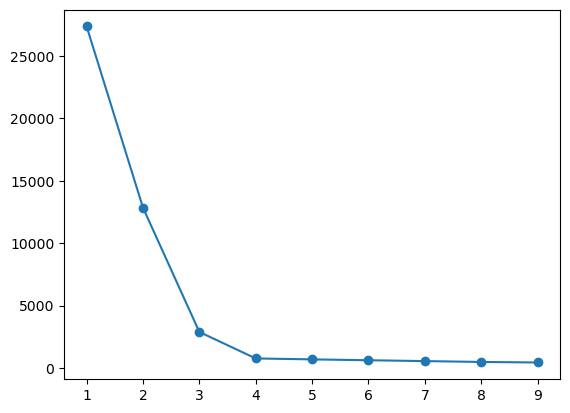

In [21]:
# Elbow method

inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(range(1,10), inertias, marker='o')
plt.show()

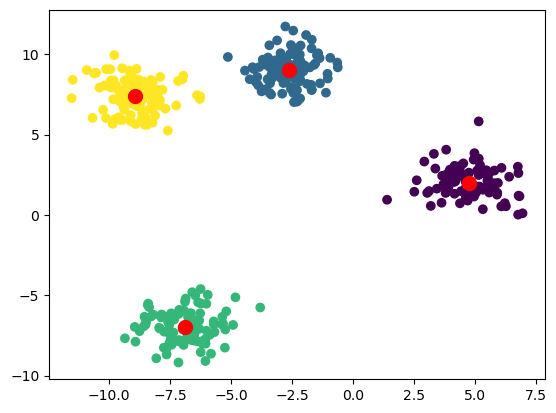

In [22]:
# set the number of clisters to the optimal value from the elbow method
km.n_clusters = 4
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

In [23]:
def plot_decision_regions(model,X):
    
    # extract feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong...')
        
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #  assign grid points to clusters
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot Voronoi regions
    plt.contourf(Z, extent=(x_min,x_max,y_min,y_max),cmap='Pastel2_r')
    plt.contour(Z, extent=(x_min,x_max,y_min,y_max),linewidths=1,colors='k')
    
    # plot data
    plt.scatter(X[:,0],X[:,1],color='k',s=15)

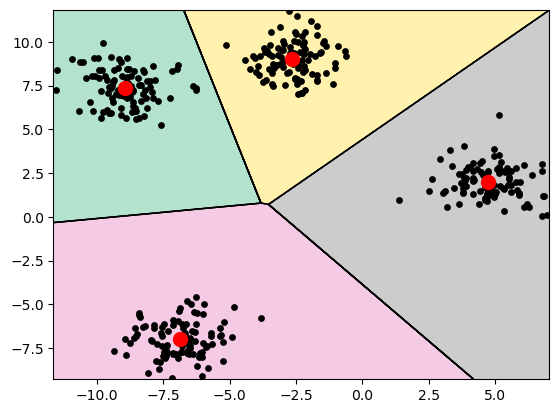

In [24]:
plot_decision_regions(km,X)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

In [27]:
centers

array([[ 4.74710337,  2.01059427],
       [-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [-8.92921104,  7.38196067]])

In [26]:
new_points = np.array([
    [-5,-5],
    [-7,5],
    [5,0],
    [0,10]
])

# predict new points
km.predict(new_points)

array([2, 3, 0, 1], dtype=int32)